In [52]:
#!pip install pandas
import os
import pandas as pd

# First I will use an example folder in of Alexandrium_catenella located in HABLAB_20220819

In [53]:
path = "/Volumes/Vortex/cnn/training_sets/IFCB/HABLAB_20220819/Alexandrium_catenella"
dir_list = os.listdir(path)
print("Files and directories in '", path, "' :")
print(dir_list)


Files and directories in ' /Volumes/Vortex/cnn/training_sets/IFCB/HABLAB_20220819/Alexandrium_catenella ' :
['D20120420T185751_IFCB010_01680.png', 'D20120420T185751_IFCB010_01700.png', 'D20120420T185751_IFCB010_01710.png', 'D20120420T185751_IFCB010_01714.png', 'D20120420T185751_IFCB010_01720.png', 'D20120420T185751_IFCB010_01730.png', 'D20120423T002604_IFCB010_00020.png', 'D20120423T125604_IFCB010_00160.png', 'D20120423T125604_IFCB010_00240.png', 'D20120423T125604_IFCB010_00910.png', 'D20120423T125604_IFCB010_00970.png', 'D20120426T001443_IFCB010_01620.png', 'D20120426T001443_IFCB010_04718.png', 'D20120426T124009_IFCB010_00050.png', 'D20150519T184053_IFCB101_00079.png', 'IFCB1_2009_146_015423_01476.png', 'IFCB1_2014_156_185244_00144.png', 'IFCB1_2015_133_191525_06682.png', 'IFCB5_2013_139_182814_01921.png', 'IFCB5_2013_144_015540_01022.png', 'D20120416T001742_IFCB010_00320.png', 'D20120416T001742_IFCB010_00340.png', 'D20120416T001742_IFCB010_00360.png', 'D20120416T001742_IFCB010_00390.

## Developing a database of dates, times, and instruments

Taking this data file as an example: "D20120415T065129_IFCB010_00250"
the date is 04-15-2012
time is 06:51:29 UTC
instrument is #10

In [54]:
from datetime import datetime

def extract_info(filename):
    # Function to extract date, time, and IFCB number from filename
    # Date will be in date format, time will be in time format, and instrument will be an integer
    date_str = filename[1:9]
    time_str = filename[10:16]
    ifcb_number = filename[21:24]
    
    date = datetime.strptime(date_str, "%Y%m%d").date()
    time = datetime.strptime(time_str, "%H%M%S").time()
    instrument = int(ifcb_number)
    
    return date, time, instrument

In [55]:
# testing the extract_info function
filename = "D20120415T065129_IFCB010_04660"
date, time, instrument = extract_info(filename)
print(f"Date: {date}, Time: {time}, IFCB Number: {instrument}")
print(type(date), type(time), type(instrument))

Date: 2012-04-15, Time: 06:51:29, IFCB Number: 10
<class 'datetime.date'> <class 'datetime.time'> <class 'int'>


## It works! Now lets extract all of the file names into a database

In [56]:
# Extract information for each file in dir_list
for file in dir_list:
    print(file)
    temp=extract_info(file)
    print(temp)
    

D20120420T185751_IFCB010_01680.png
(datetime.date(2012, 4, 20), datetime.time(18, 57, 51), 10)
D20120420T185751_IFCB010_01700.png
(datetime.date(2012, 4, 20), datetime.time(18, 57, 51), 10)
D20120420T185751_IFCB010_01710.png
(datetime.date(2012, 4, 20), datetime.time(18, 57, 51), 10)
D20120420T185751_IFCB010_01714.png
(datetime.date(2012, 4, 20), datetime.time(18, 57, 51), 10)
D20120420T185751_IFCB010_01720.png
(datetime.date(2012, 4, 20), datetime.time(18, 57, 51), 10)
D20120420T185751_IFCB010_01730.png
(datetime.date(2012, 4, 20), datetime.time(18, 57, 51), 10)
D20120423T002604_IFCB010_00020.png
(datetime.date(2012, 4, 23), datetime.time(0, 26, 4), 10)
D20120423T125604_IFCB010_00160.png
(datetime.date(2012, 4, 23), datetime.time(12, 56, 4), 10)
D20120423T125604_IFCB010_00240.png
(datetime.date(2012, 4, 23), datetime.time(12, 56, 4), 10)
D20120423T125604_IFCB010_00910.png
(datetime.date(2012, 4, 23), datetime.time(12, 56, 4), 10)
D20120423T125604_IFCB010_00970.png
(datetime.date(2012,

ValueError: time data 'FCB1_200' does not match format '%Y%m%d'

### Slight problem, not all of the files have the same format!
Lets investigate what / how many files have alternative formats

In [58]:
import re

# Define the expected pattern
pattern = re.compile(r'^D\d{8}T\d{6}_IFCB\d{3}_\d{5}\.png$')

# Filter files that do not match the pattern
different_format_files = [file for file in dir_list if not pattern.match(file)]

print("Files with different formats:")
print(different_format_files)

Files with different formats:
['IFCB1_2009_146_015423_01476.png', 'IFCB1_2014_156_185244_00144.png', 'IFCB1_2015_133_191525_06682.png', 'IFCB5_2013_139_182814_01921.png', 'IFCB5_2013_144_015540_01022.png']


## What percent of files follow a differnt profile?

In [59]:
# Calculate the percentage of files that don't match the expected format
total_files = len(dir_list) + len(different_format_files)
percent_different_format = (len(different_format_files) / total_files) * 100

print(f"Percentage of files that don't match the expected format: {percent_different_format:.2f}%")

Percentage of files that don't match the expected format: 0.33%


### These files do not follow this same format so we will ignore them for now

In [60]:
# Remove files in different_format_files from dir_list
dir_list = [file for file in dir_list if file not in different_format_files]


## Lets create our pandas DF

In [61]:
data = [extract_info(file) for file in dir_list]

# Create a DataFrame
df = pd.DataFrame(data, columns=['Date', 'Time', 'Instrument'])
print(df)

            Date      Time  Instrument
0     2012-04-20  18:57:51          10
1     2012-04-20  18:57:51          10
2     2012-04-20  18:57:51          10
3     2012-04-20  18:57:51          10
4     2012-04-20  18:57:51          10
...          ...       ...         ...
1497  2012-04-06  00:04:33          10
1498  2012-04-06  00:04:33          10
1499  2012-04-06  00:04:33          10
1500  2012-04-06  00:04:33          10
1501  2012-04-06  00:04:33          10

[1502 rows x 3 columns]


In [62]:
df['Instrument'].unique()

array([ 10, 101])

## Lets start with some exploritory plots

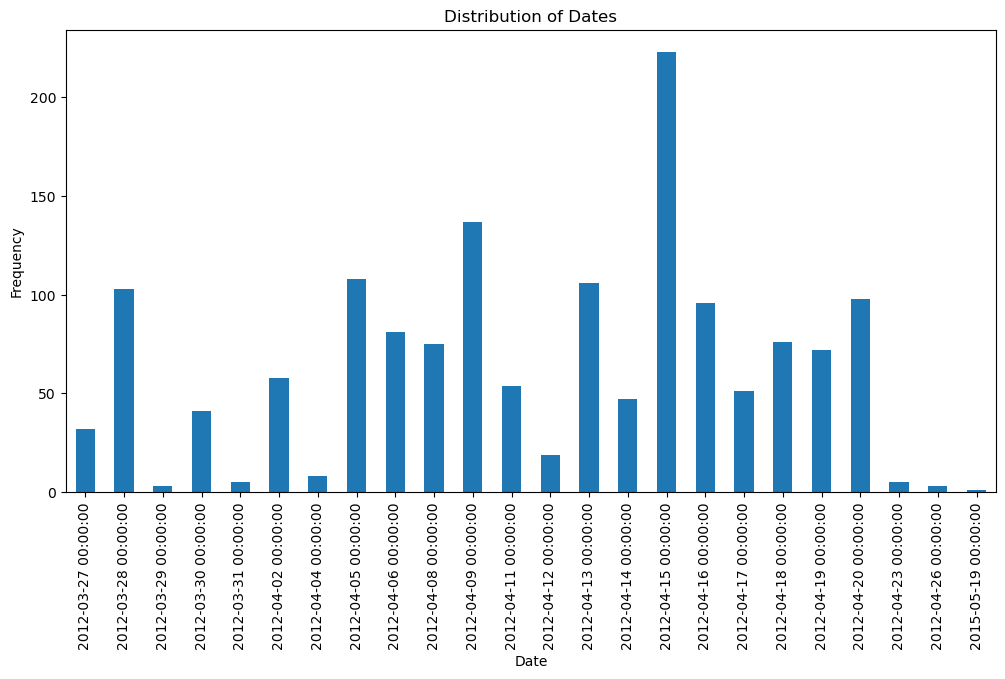

In [63]:
import matplotlib.pyplot as plt

# Plot the distribution of dates
plt.figure(figsize=(12, 6))
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


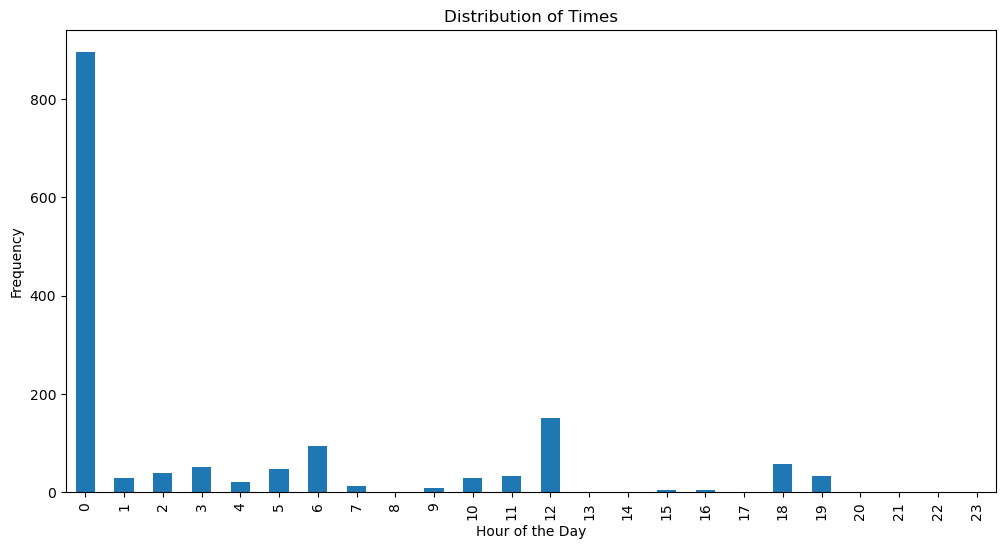

In [67]:

# Plot the distribution of times
plt.figure(figsize=(12, 6))
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

# Create a series with all hours of the day
all_hours = pd.Series(range(24), name='Hour')

# Count the occurrences of each hour and reindex to include all hours
hour_counts = df['Hour'].value_counts().sort_index().reindex(all_hours, fill_value=0)

# Plot the distribution
hour_counts.plot(kind='bar')
plt.title('Distribution of Times')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


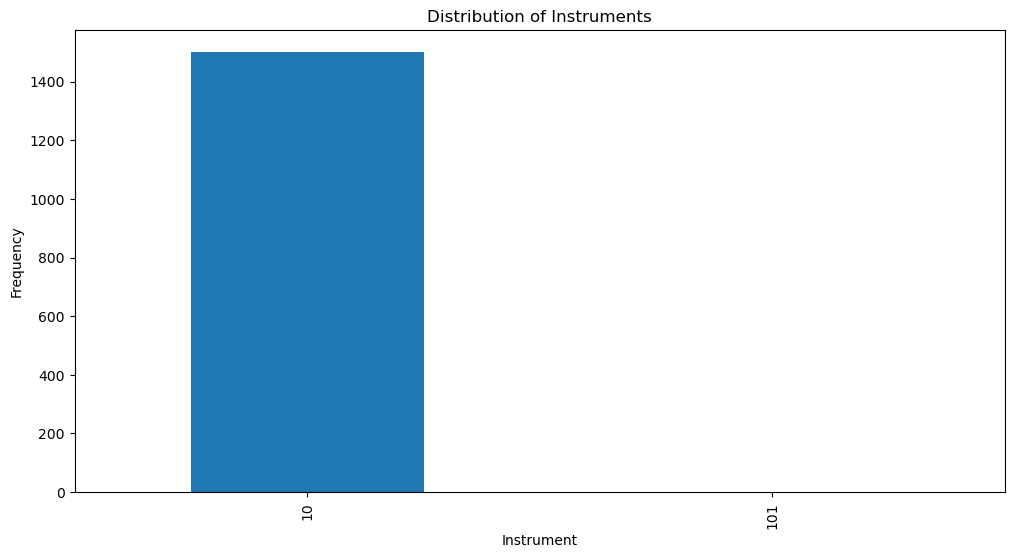

In [65]:

# Plot the distribution of instruments
plt.figure(figsize=(12, 6))
df['Instrument'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Instruments')
plt.xlabel('Instrument')
plt.ylabel('Frequency')
plt.show()